<a href="https://colab.research.google.com/github/Shiyasalloor/Image_and_Video_processing_lab/blob/main/Set_2_Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files


In [2]:
def load_mask(filename):
    with open(filename, 'r') as f:
        mask = [list(map(float, line.strip().split())) for line in f if line.strip()]
    return np.array(mask, dtype=np.float32)


In [3]:
def correlation(image, mask):
    m, n = mask.shape
    pad_h, pad_w = m // 2, n // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+m, j:j+n]
            result[i, j] = np.sum(region * mask)

    return np.clip(result, 0, 255).astype(np.uint8)


In [4]:
def convolution(image, mask):
    flipped_mask = np.flipud(np.fliplr(mask))
    return correlation(image, flipped_mask)

In [5]:
def test_filter(img, mask_file, normalize=True):
    mask = load_mask(mask_file)
    if normalize:
        mask = mask / np.sum(mask)

    corr_result = correlation(img, mask)
    conv_result = convolution(img, mask)

    print(f"Results with mask: {mask_file}")
    cv2_imshow(corr_result)
    cv2_imshow(conv_result)

Upload an image:


Saving dog.png to dog (2).png
Upload ASCII mask file (e.g., 3x3 averaging mask):


Saving 3by3.txt to 3by3 (1).txt
Results with mask: 3by3 (1).txt


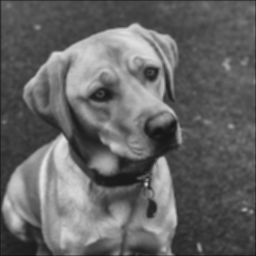

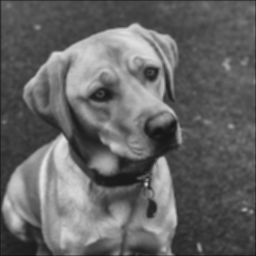

Upload ASCII mask file (e.g., 3x3 averaging mask):


Saving 7by7.txt to 7by7.txt
Results with mask: 7by7.txt


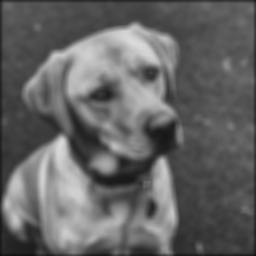

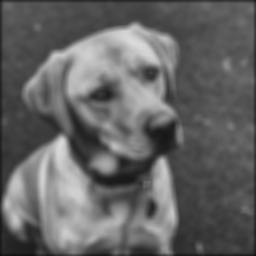

Upload ASCII mask file (e.g., 3x3 averaging mask):


Saving 11by11.txt to 11by11.txt
Results with mask: 11by11.txt


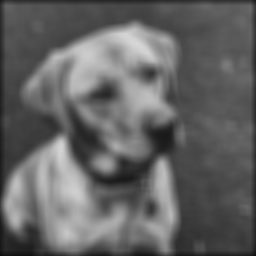

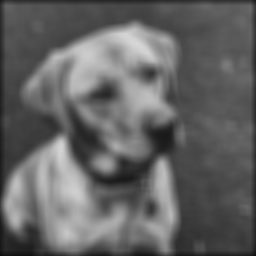

In [8]:
print("Upload an image:")
uploaded = files.upload()
image_path = next(iter(uploaded))
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
gray = cv2.resize(gray, (256, 256))

for i in range (3):
  print("Upload ASCII mask file (e.g., 3x3 averaging mask):")
  uploaded_mask = files.upload()
  mask_file = next(iter(uploaded_mask))

  test_filter(gray, mask_file)

